In [1]:
import os
import numpy as np
import pandas
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Confusion matrix

In [2]:
confmat_number_fontsize = 15
confmat_label_fontsize = 16
confmat_tick_fontsize=14
confmat_colorbar_tick_fontsize = 13

## Plot function 
(출처: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

In [3]:
def plot_confusion_matrix(confusion_mat, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                         colorbar_range=None, 
                         numType = None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
#     if not title:
#         if normalize:
#             title = 'Normalized confusion matrix'
#         else:
#             title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm =confusion_mat
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    if colorbar_range is not None:
        im.set_clim(colorbar_range[0], colorbar_range[1])
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.tick_params(labelsize=confmat_colorbar_tick_fontsize)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,)
    ax.tick_params(labelsize = confmat_tick_fontsize)
    
    ax.set_xlabel('Predicted age-group', fontsize=confmat_label_fontsize)
    ax.set_ylabel('True age-group', fontsize=confmat_label_fontsize)
    
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    if numType=='int':
        fmt = 'd'
        
    else:
        fmt = '.1f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black", fontsize=confmat_number_fontsize)
    fig.tight_layout()


    return ax



## General setting

In [4]:
class_names = np.array(['0-19', '20-49', 'over 50'])
np.set_printoptions(precision=2)

## 3 cls 학습 결과 (5 fold cross validation 결과)

0.9065656565656567
Confusion matrix, without normalization
[[ 69.2  10.    0. ]
 [  3.2 189.    6.2]
 [  0.   10.2  29. ]]


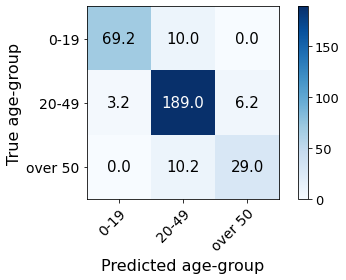

In [5]:

confusion_matrix_3cls_concat = np.load('E:/Thesis_research/results_materials/Dental/raw_prediction_results/5e-5/3classes/3cls_conf_mat_tot.npy')
confusion_matrix_3cls = np.average(confusion_matrix_3cls_concat, axis = 0)

overall_acc_3cls = np.sum(np.diag(confusion_matrix_3cls)) / np.sum(np.sum(confusion_matrix_3cls))
print(overall_acc_3cls)
plot_confusion_matrix(confusion_matrix_3cls, classes=class_names,
                      )
plt.savefig('three_group_confmat_5fold.pdf', bbox_inches='tight')

plt.show()


## 5 cls 학습 결과 (5 fold cross validation 결과)

### Real five result

0.7417929292929294
Confusion matrix, without normalization
[[ 72.4   6.4   0.2   0.2   0. ]
 [  1.6 100.2   6.2   0.6   0.2]
 [  1.8  18.6  23.6   6.2   3. ]
 [  0.2   8.   10.6   7.   10.6]
 [  0.    0.4   1.4   5.6  31.8]]


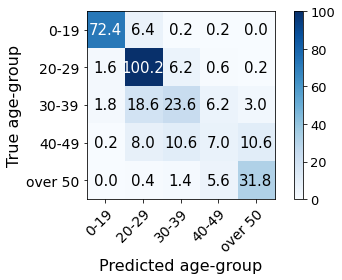

In [6]:
class_names_five_group = np.array(['0-19', '20-29', '30-39', '40-49', 'over 50'])


confusion_matrix_5cls_concat = np.load('E:/Thesis_research/results_materials/Dental/raw_prediction_results/5e-5/5classes/5cls_conf_mat_tot.npy')
confusion_matrix_5cls = np.average(confusion_matrix_5cls_concat, axis = 0)

overall_acc_5cls = np.sum(np.diag(confusion_matrix_5cls)) / np.sum(np.sum(confusion_matrix_5cls))
print(overall_acc_5cls)

plot_confusion_matrix(confusion_matrix_5cls, classes=class_names_five_group)

plt.savefig('five_group_confmat_5fold_Realfive.pdf', bbox_inches='tight')

plt.show()

### 3 class 기준 변환 결과

0.9002525252525252
Confusion matrix, without normalization
[[ 72.4   6.8   0. ]
 [  3.6 181.   13.8]
 [  0.    7.4  31.8]]


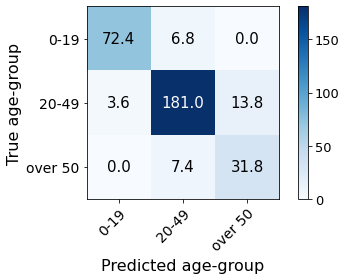

In [8]:

confusion_matrix_5cls_concat = np.load('E:/Thesis_research/results_materials/Dental/raw_prediction_results/5e-5/5classes/5cls_conf_mat_tot(regroup).npy')
confusion_matrix_5cls = np.average(confusion_matrix_5cls_concat, axis = 0)
confusion_matrix_5cls_std = np.std(confusion_matrix_5cls_concat, axis = 0)

overall_acc_5cls = np.sum(np.diag(confusion_matrix_5cls)) / np.sum(np.sum(confusion_matrix_5cls))
print(overall_acc_5cls)

plot_confusion_matrix(confusion_matrix_5cls, classes=class_names)

plt.savefig('five_group_confmat_5fold.pdf', bbox_inches='tight')

plt.show()

### Color bar range 서로 맞춰보기 (3cls vs 5cls)

Confusion matrix, without normalization
[[ 69.2  10.    0. ]
 [  3.2 189.    6.2]
 [  0.   10.2  29. ]]
Confusion matrix, without normalization
[[ 72.4   6.8   0. ]
 [  3.6 181.   13.8]
 [  0.    7.4  31.8]]


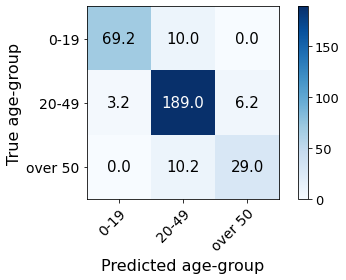

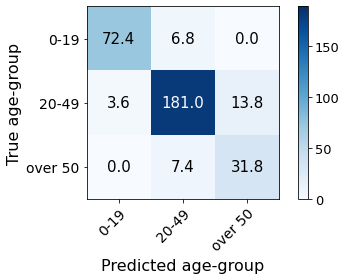

In [9]:
confmat_min_val = np.min((np.min(confusion_matrix_3cls), np.min(confusion_matrix_5cls)))
confmat_max_val = np.max((np.max(confusion_matrix_3cls), np.max(confusion_matrix_5cls)))

plot_confusion_matrix(confusion_matrix_3cls, classes=class_names, colorbar_range=[confmat_min_val, confmat_max_val])
plt.savefig('three_group_confmat_colorAdjust.png', dpi=300, bbox_inches='tight')
# plt.savefig('three_group_confmat_colorAdjust.pdf', bbox_inches='tight')

plot_confusion_matrix(confusion_matrix_5cls, classes=class_names, colorbar_range=[confmat_min_val, confmat_max_val])
plt.savefig('five_group_confmat_colorAdjust.png', dpi=300, bbox_inches='tight')
# plt.savefig('five_group_confmat_colorAdjust.pdf', bbox_inches='tight')
